<a href="https://colab.research.google.com/github/imranrahman1997/TensorFlow-Course/blob/master/House_price_prediction_with_random_forest_and_Gradient_boosting_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data_train = pd.read_csv("/content/drive/MyDrive/Machine Learning_2022/House price prediction/train.csv")

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test = pd.read_csv("/content/drive/MyDrive/Machine Learning_2022/House price prediction/test.csv")

In [5]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA
Data visualization

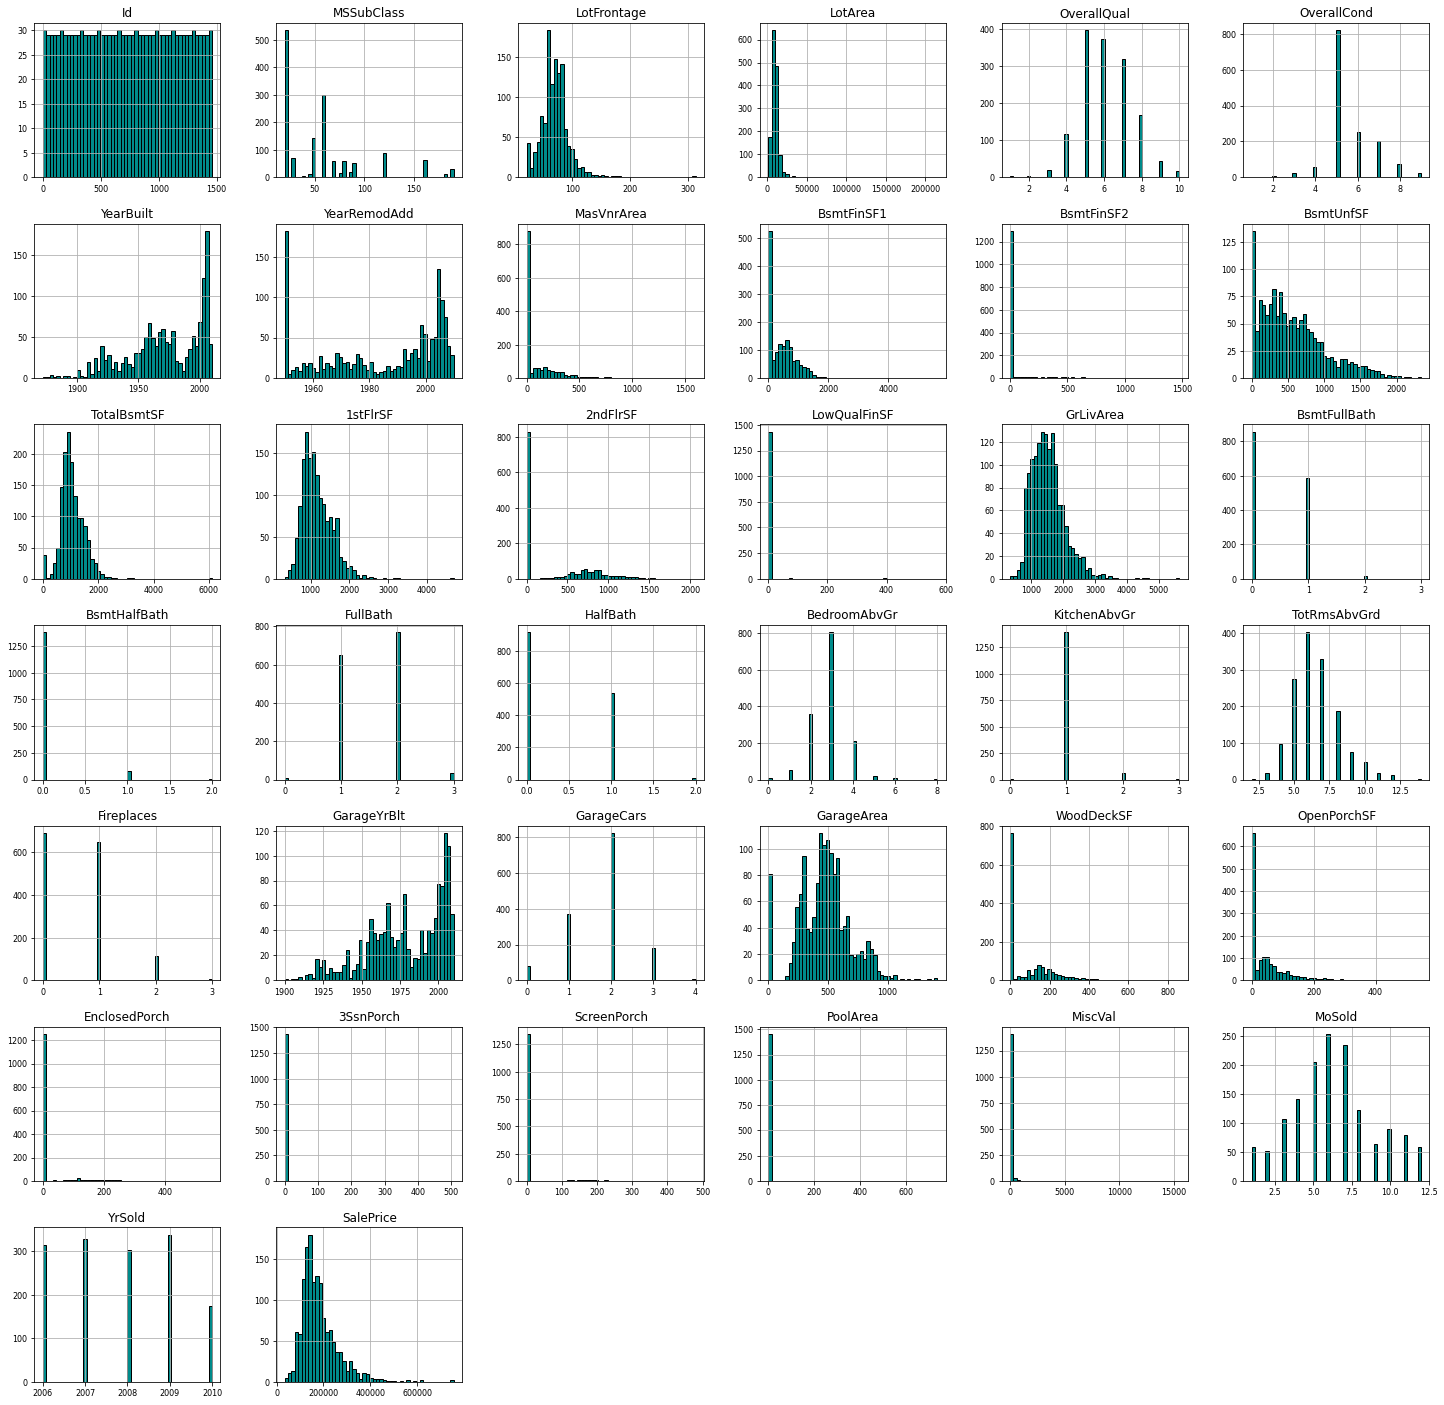

In [7]:
fig = data_train.hist(figsize = (25, 25), bins = 50,
                      color = 'darkcyan',
                      edgecolor = 'black',
                      xlabelsize = 8,
                      ylabelsize = 8)

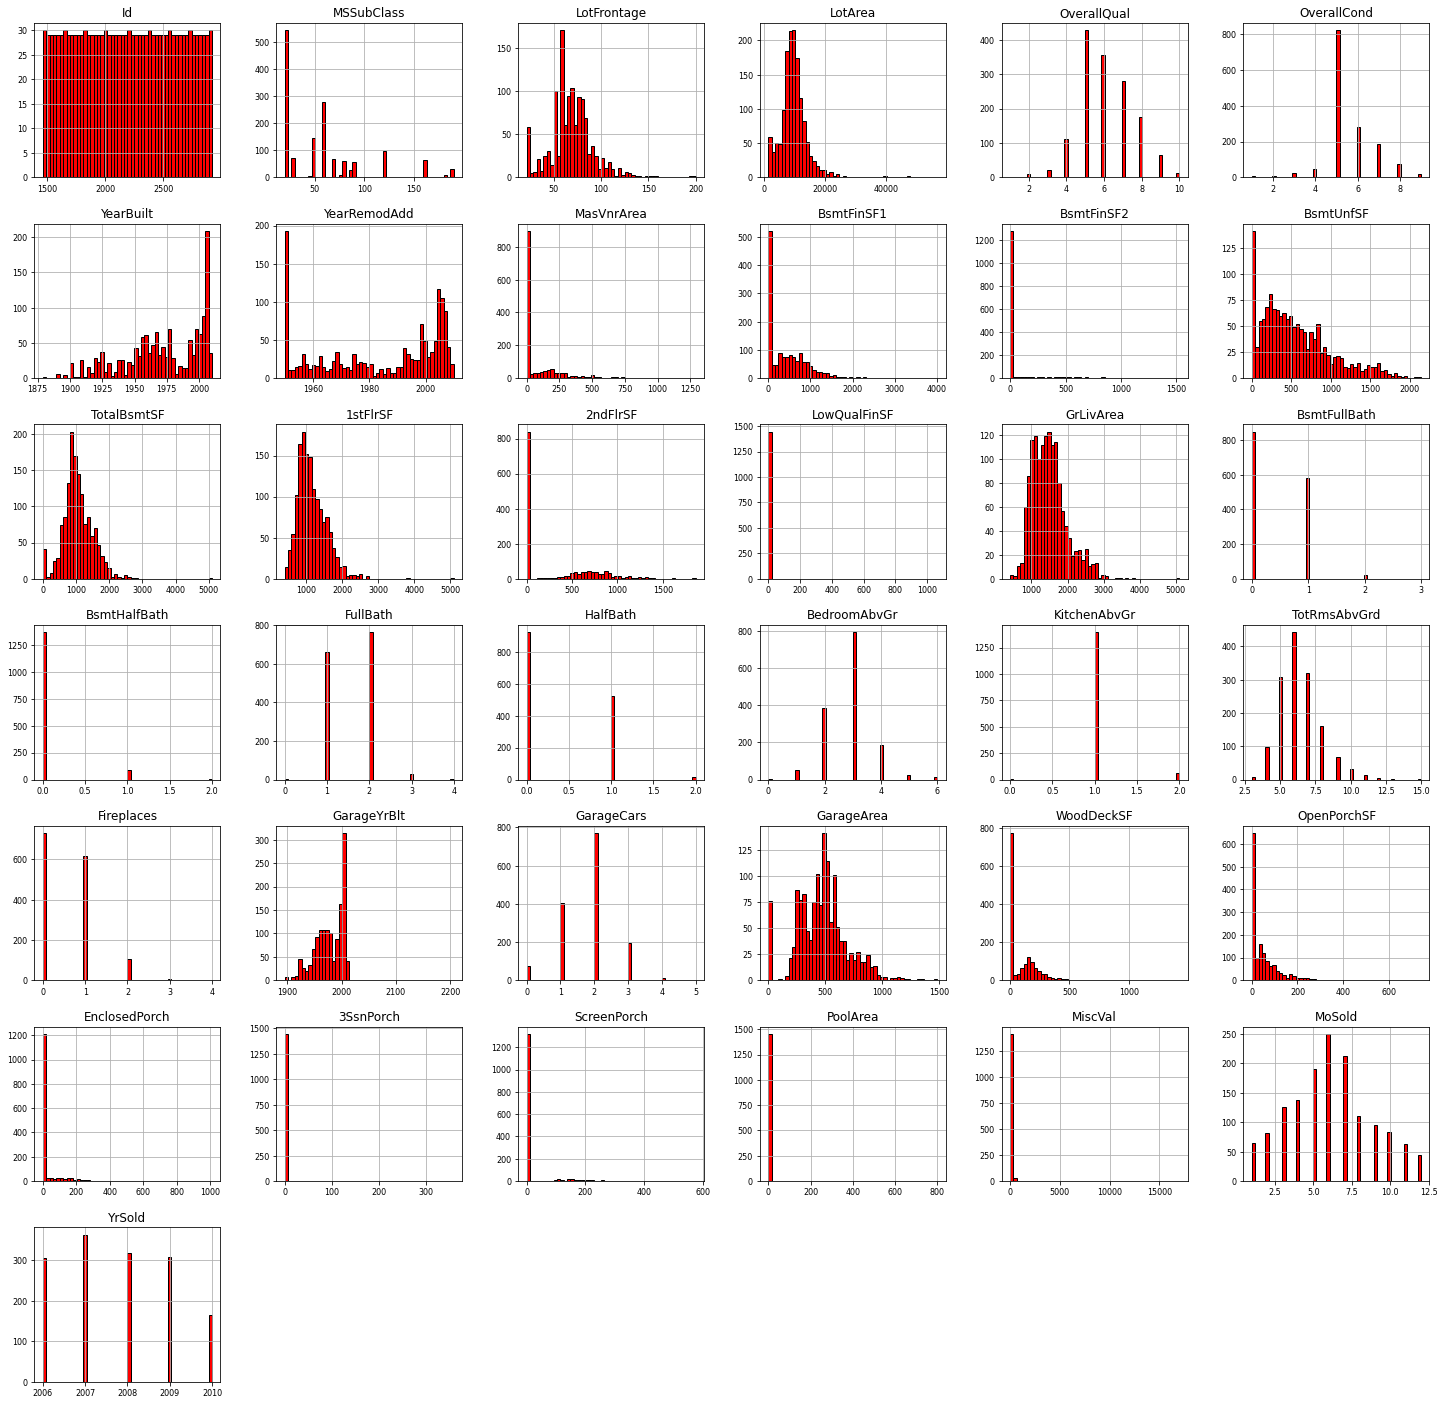

In [8]:
fig_test = data_test.hist(figsize = (25,25),
                          bins = 50,
                          color = 'red',
                          edgecolor = 'black',
                          xlabelsize = 8,
                          ylabelsize = 8)

**visualize data as scatterplot**

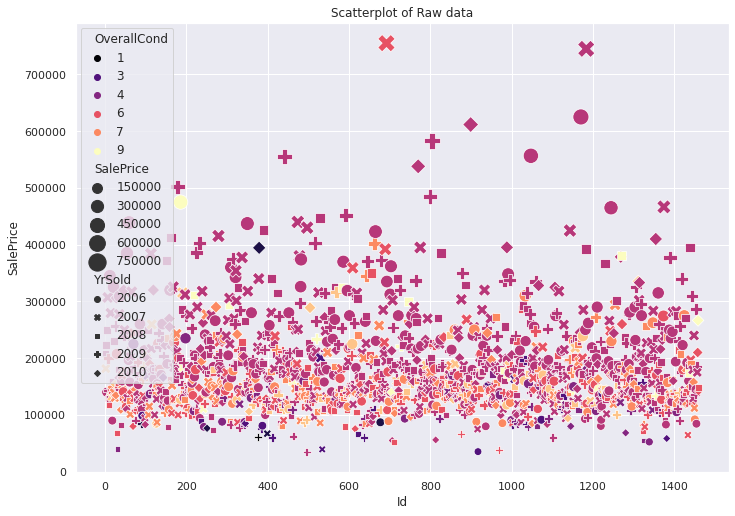

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x = data_train.Id, y = data_train.SalePrice,
                   size = data_train.SalePrice,
                   hue = data_train.OverallCond,
                   style = data_train.YrSold,
                   sizes = (60,300),
                   palette = 'magma')
plt.title("Scatterplot of Raw data")
plt.show()

**Null values visualization**

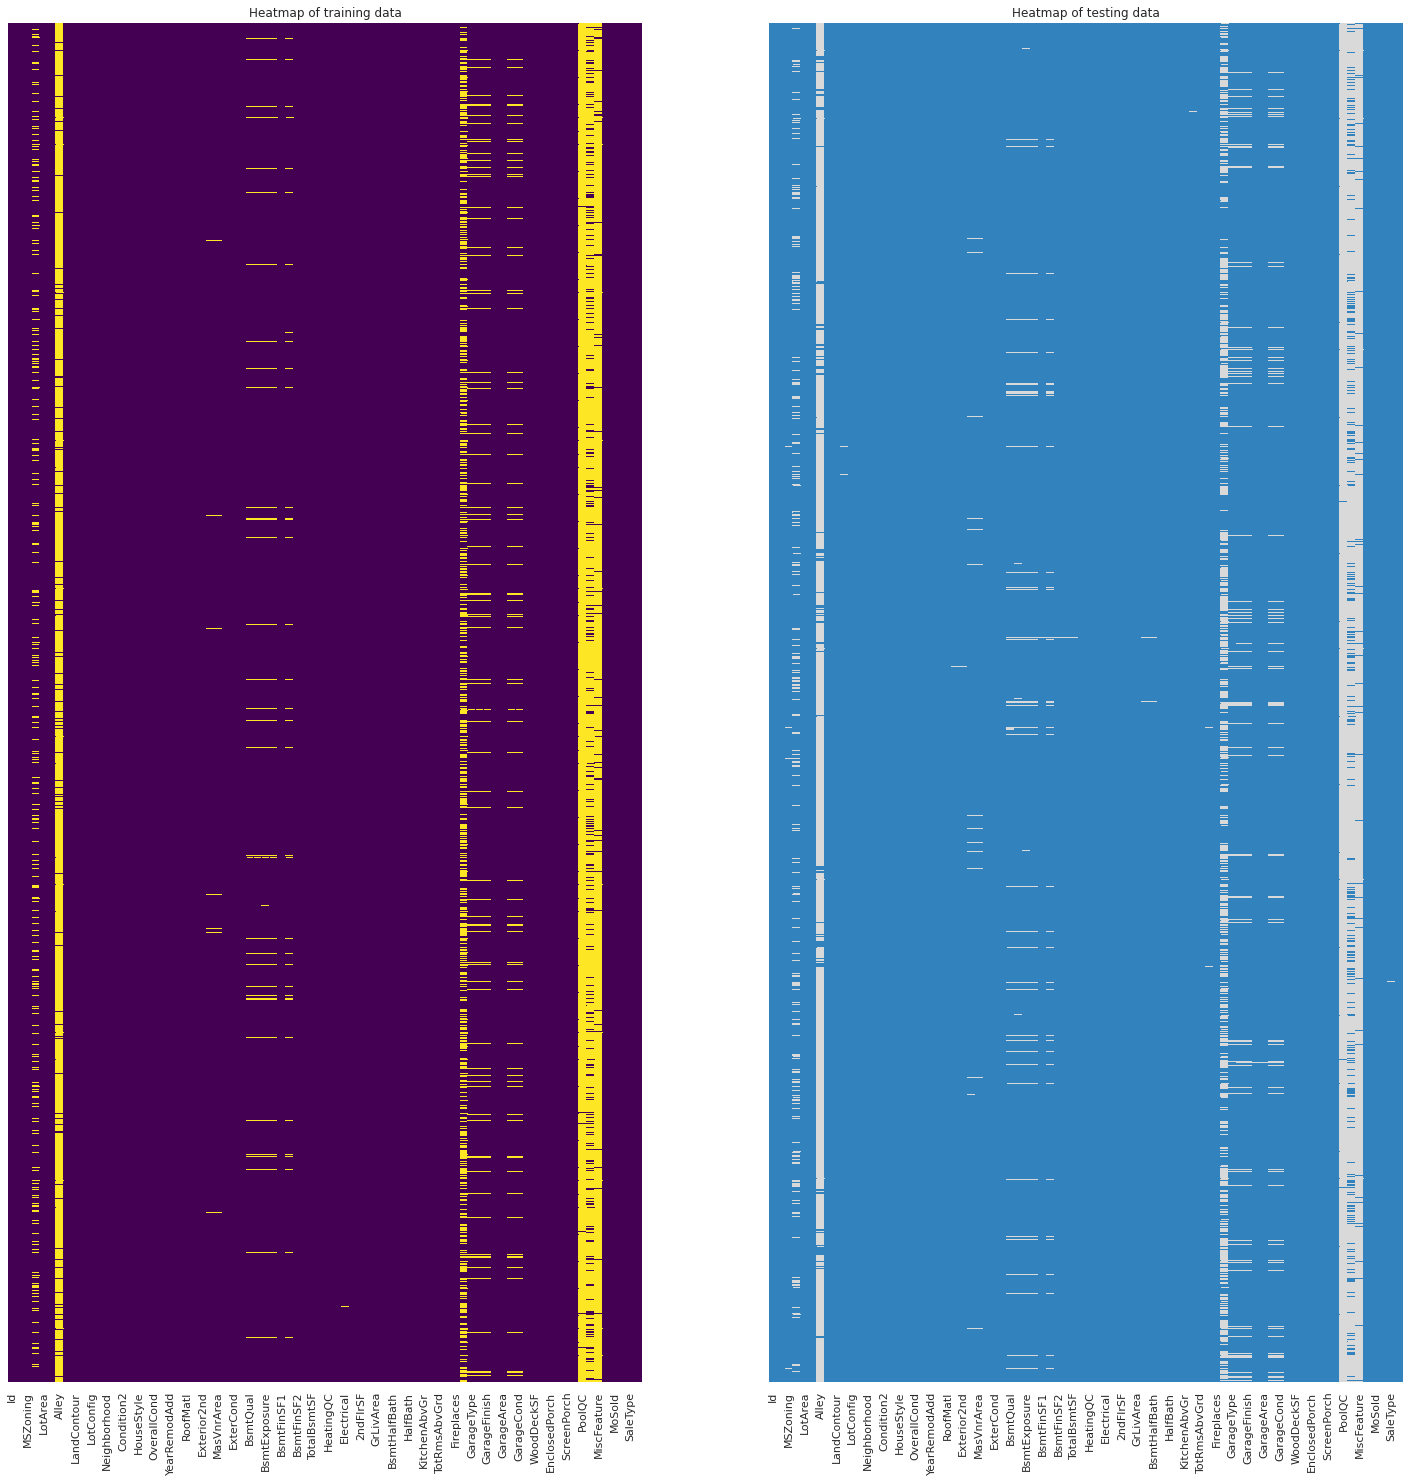

In [15]:
fig, axes = plt.subplots(1, 2, sharex = True,figsize = (25,25))
sns.heatmap(ax = axes[0], yticklabels = False,
            data = data_train.isnull(),
            cbar = False,
            cmap = 'viridis')
sns.heatmap(ax = axes[1], yticklabels = False,
            data = data_test.isnull(),
            cbar = False,
            cmap = 'tab20c')
axes[0].set_title("Heatmap of training data")
axes[1].set_title("Heatmap of testing data")
plt.show()

# Data Pre-processing



Text(0.5, 1.0, 'Lables with correlation coefficient > Threshold (0.5)')

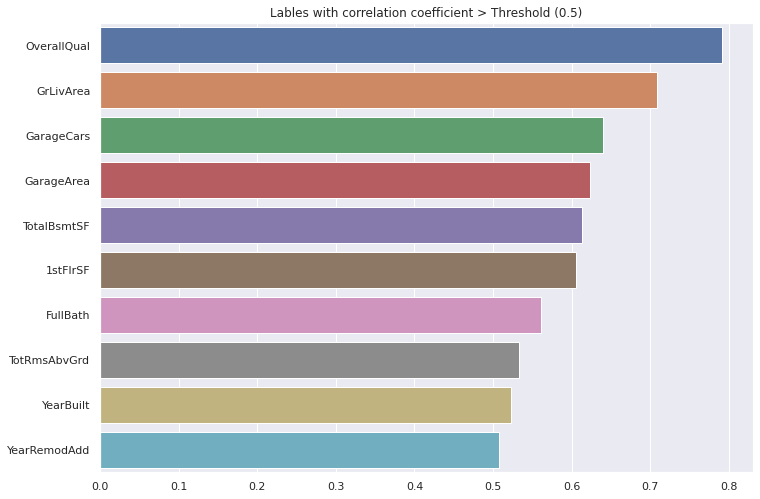

In [17]:
THRESHOLD = 0.5

data = data_train.corr()["SalePrice"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>THRESHOLD:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Lables with correlation coefficient > Threshold (0.5)')

In [18]:
unnecessary = []
lab = data_train.SalePrice
idCol = data_test.Id
data_train = data_train.drop(columns=[str(item) for item in data_train.columns[1:] if str(item) not in labels])
data_test = data_test.drop(columns=[str(item) for item in data_test.columns[1:] if str(item) not in labels])
data_train = data_train.drop(columns=['Id'])
data_test = data_test.drop(columns=['Id'])

In [19]:
data_train = data_train.fillna(method = 'bfill')
data_test = data_test.fillna(method = 'bfill')

In [20]:
sum(data_train.isnull().sum())

0

In [21]:
sum(data_test.isnull().sum())

0

In [22]:
X_train = data_train.to_numpy()
X_test = data_test.to_numpy()

y_train = lab

In [23]:
X_train.shape, y_train.shape, X_test.shape

((1460, 10), (1460,), (1459, 10))

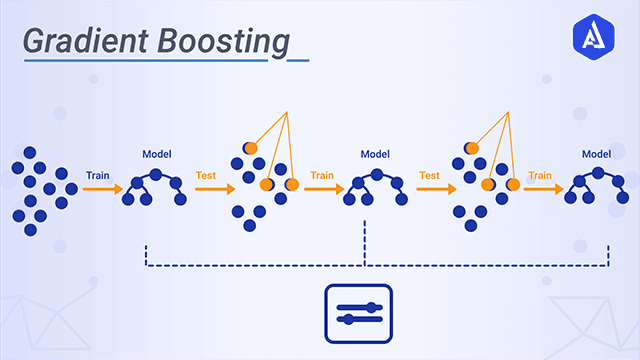

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
reg = GradientBoostingRegressor(random_state = 0,
                                loss = 'ls',
                                learning_rate = 0.1)

In [28]:
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', random_state=0)

In [30]:
y_prediction = reg.predict(X_test)

In [31]:
score = reg.score(X_train, y_train)
score

0.9322603878292162

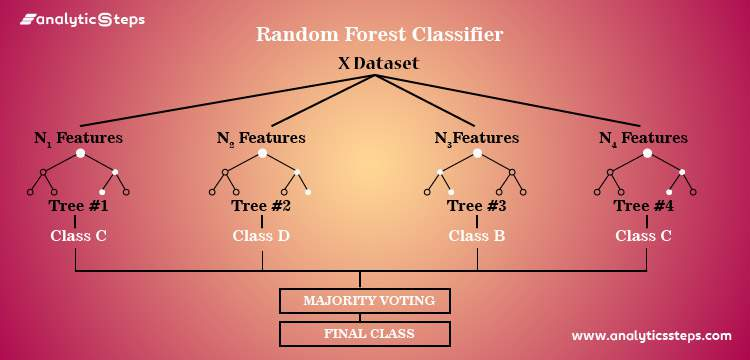

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier(max_depth = 15)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [35]:
prediction = model.predict(X_train)

In [36]:
R2_score = sklearn.metrics.r2_score(y_train, prediction)
R2_score

0.9997128516057641